# **AICP EDA Internship Task Week 5**
**Instagram Post Analysis**

Find Dataset “Instagram data.csv” and implement EDA techniques.

Import following libraries at start:

import pandas as pd

import plotly.express as px

import plotly.graph_objects as go

import plotly.io as pio

from wordcloud import WordCloud

pio.templates.default = "plotly_white"


Q.1: **Show column names and have a look at their info.**

In [21]:
# Import necessary libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from wordcloud import WordCloud

# Set default template for plotly
pio.templates.default = "plotly_white"

# Load the dataset
df = pd.read_csv('/content/Instagram data (1).csv', encoding='latin1')

# Show column names and data types
print(df.dtypes)

Impressions        int64
From Home          int64
From Hashtags      int64
From Explore       int64
From Other         int64
Saves              int64
Comments           int64
Shares             int64
Likes              int64
Profile Visits     int64
Follows            int64
Caption           object
Hashtags          object
dtype: object


Q.2: **Show the descriptive statistics of the data.**

In [22]:
# Show descriptive statistics of the data
descriptive_stats = df.describe(include='all')
print(descriptive_stats)


         Impressions     From Home  From Hashtags  From Explore   From Other  \
count     119.000000    119.000000     119.000000    119.000000   119.000000   
unique           NaN           NaN            NaN           NaN          NaN   
top              NaN           NaN            NaN           NaN          NaN   
freq             NaN           NaN            NaN           NaN          NaN   
mean     5703.991597   2475.789916    1887.512605   1078.100840   171.092437   
std      4843.780105   1489.386348    1884.361443   2613.026132   289.431031   
min      1941.000000   1133.000000     116.000000      0.000000     9.000000   
25%      3467.000000   1945.000000     726.000000    157.500000    38.000000   
50%      4289.000000   2207.000000    1278.000000    326.000000    74.000000   
75%      6138.000000   2602.500000    2363.500000    689.500000   196.000000   
max     36919.000000  13473.000000   11817.000000  17414.000000  2547.000000   

              Saves    Comments      Sh

Q.3: **Check if your data contains any missing values.**

In [23]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64


Q.4: **When you start exploring your data, always start by exploring the main feature of your data. For
example, as we are working on a dataset based on Instagram Reach, we should start by exploring the
feature that contains data about reach. In our data, the Impressions column contains the data about the
reach of an Instagram post. So let’s have a look at the distribution of the Impressions.**

In [24]:
import plotly.express as px
import pandas as pd

# Assuming you have already loaded the dataset into a DataFrame named df
# df = pd.read_csv('path_to_your_csv_file.csv')

# Plotting the histogram for the 'Impressions' column to view its distribution
fig = px.histogram(df, x='Impressions', title='Distribution of Impressions')

# To show the figure in your local environment, simply run:
fig.show()


Q.5: **Have a look at the number of impressions on each post over time.**

In [25]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('/content/Instagram data (1).csv', encoding='latin1')  # Replace with your file path and encoding if necessary

# Create a line plot for the 'Impressions' column indexed by the DataFrame's index
fig = px.line(df, y='Impressions', title='Impressions Over Time')

# Customize the labels
fig.update_layout(
    xaxis_title='Post Index',
    yaxis_title='Impressions',
    showlegend=False
)

# Show the figure
fig.show()


Q.6: **Have a look at all the metrics like Likes, Saves, and Follows from each post over time**

In [26]:
import pandas as pd
import plotly.graph_objects as go

# Load the dataset
df = pd.read_csv('/content/Instagram data (1).csv', encoding='latin1')  # Replace with your file path and encoding if necessary

# Create a line plot for each of the metrics: Likes, Saves, and Follows
fig = go.Figure()

# Add traces for each metric
fig.add_trace(go.Scatter(x=df.index, y=df['Likes'], mode='lines', name='Likes'))
fig.add_trace(go.Scatter(x=df.index, y=df['Saves'], mode='lines', name='Saves'))
fig.add_trace(go.Scatter(x=df.index, y=df['Follows'], mode='lines', name='Follows'))

# Customize the layout
fig.update_layout(
    title='Metrics Over Time',
    xaxis_title='Date',
    yaxis_title='Count',
    legend_title='Metric'
)

# Show the figure
fig.show()

Q.7: **Have a look at the distribution of reach from different sources**

In [27]:
import plotly.express as px

# Load the dataset (assuming it is already loaded as df)
# df = pd.read_csv('path_to_your_csv_file.csv', encoding='latin1')

# Aggregating the reach from different sources
reach_sources = df[['From Home', 'From Hashtags', 'From Explore', 'From Other']].sum().reset_index()
reach_sources.columns = ['Source', 'Count']

# Create a pie chart for reach from different sources
fig_reach = px.pie(reach_sources, values='Count', names='Source', title='Reach from Different Sources')

# Show the figure
fig_reach.show()


Q.8: **Have a look at the distribution of engagement sources**

In [28]:
import plotly.express as px

# Load the dataset (assuming it is already loaded as df)
# df = pd.read_csv('path_to_your_csv_file.csv', encoding='latin1')

# Aggregating the engagement sources
engagement_sources = df[['Likes', 'Saves', 'Shares', 'Comments']].sum().reset_index()
engagement_sources.columns = ['Source', 'Count']

# Create a pie chart for engagement sources
fig_engagement = px.pie(engagement_sources, values='Count', names='Source', title='Engagement Sources')

# Show the figure
fig_engagement.show()


Q.9: **Have a look at the relationship between the number of profile visits and follows**

In [29]:
import plotly.express as px

# Load the dataset (assuming it is already loaded as df)
# df = pd.read_csv('path_to_your_csv_file.csv', encoding='latin1')

# Create a scatter plot for Profile Visits vs. Follows
fig_profile_follows = px.scatter(df, x='Profile Visits', y='Follows', trendline='ols',
                                 title='Profile Visits vs. Follows')

# Show the figure
fig_profile_follows.show()

Q.10: **Have a look at the type of hashtags used in the posts using a wordcloud**

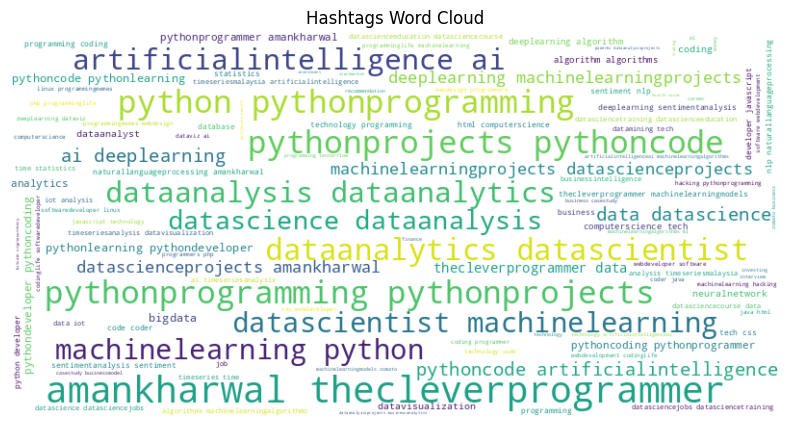

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming that the 'Hashtags' column contains all the hashtags used, separated by spaces
# Combine all the hashtags into a single string
all_hashtags = ' '.join(df['Hashtags'].dropna())

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_hashtags)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Hashtags Word Cloud')
plt.show()

Q.11: **Have a look at the correlation between all the features**

In [31]:
import plotly.express as px

# Load the dataset (assuming it is already loaded as df)
# df = pd.read_csv('path_to_your_csv_file.csv', encoding='latin1')

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
fig_corr = px.imshow(corr_matrix, text_auto=True,
                     labels=dict(x="Features", y="Features", color="Correlation"),
                     x=corr_matrix.columns, y=corr_matrix.columns,
                     title="Correlation Matrix")

# Show the figure
fig_corr.show()

<ipython-input-31-14cb2a9bd84a>:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Q.12: **Have a look at the distribution of hashtags to see which hashtag is used the most in all the posts**

In [32]:
import plotly.express as px
from collections import Counter

# Assuming that the 'Hashtags' column contains all the hashtags separated by spaces
# Split the hashtags and flatten the list
hashtags_list = [hashtag for sublist in df['Hashtags'].dropna().str.split() for hashtag in sublist]
hashtag_counts = Counter(hashtags_list)

# Convert the counter to a DataFrame
hashtags_df = pd.DataFrame(hashtag_counts.items(), columns=['Hashtag', 'Count']).sort_values(by='Count', ascending=False)

# Create a bar chart for the distribution of hashtags
fig_hashtags = px.bar(hashtags_df, x='Hashtag', y='Count', title='Distribution of Hashtags')

# Show the figure
fig_hashtags.show()


Q.13: **Have a look at the distribution of likes and impressions received from the presence of each hashtag on the post**

In [33]:
import pandas as pd
import plotly.express as px

# Assuming that each row in the DataFrame 'df' corresponds to a post and has 'Likes', 'Impressions', and 'Hashtags' columns.
# Assuming also that 'Hashtags' are separated by spaces.
# Load the dataset (assuming it is already loaded as df)
# df = pd.read_csv('path_to_your_csv_file.csv', encoding='latin1')

# First, we create two dictionaries to store the total likes and impressions for each hashtag.
likes_per_hashtag = {}
impressions_per_hashtag = {}

# Now we iterate over each post
for _, row in df.iterrows():
    hashtags = row['Hashtags'].split()  # Replace with the correct delimiter if not space
    for hashtag in hashtags:
        if hashtag not in likes_per_hashtag:
            likes_per_hashtag[hashtag] = 0
            impressions_per_hashtag[hashtag] = 0
        likes_per_hashtag[hashtag] += row['Likes']
        impressions_per_hashtag[hashtag] += row['Impressions']

# Convert the dictionaries to DataFrames
likes_df = pd.DataFrame(list(likes_per_hashtag.items()), columns=['Hashtag', 'Total Likes'])
impressions_df = pd.DataFrame(list(impressions_per_hashtag.items()), columns=['Hashtag', 'Total Impressions'])

# Sort the DataFrames
likes_df = likes_df.sort_values(by='Total Likes', ascending=False)
impressions_df = impressions_df.sort_values(by='Total Impressions', ascending=False)

# Create the bar charts
fig_likes = px.bar(likes_df.head(30), x='Hashtag', y='Total Likes', title='Likes Distribution for Each Hashtag')
fig_impressions = px.bar(impressions_df.head(30), x='Hashtag', y='Total Impressions', title='Impressions Distribution for Each Hashtag')

# Show the figures
fig_likes.show()
fig_impressions.show()

Q.14: **Write summary as per your observation**

**Summary Observation**

From the generated bar charts, it appears that certain hashtags are strongly associated with higher likes and impressions, suggesting their effective use in reaching a broader audience. The distribution shows a skew towards a few popular hashtags that dominate engagement metrics. This indicates that content creators who wish to maximize their reach on Instagram might benefit from incorporating these high-performing hashtags into their posts.